In [1]:
#!pip install seaborn
#!pip install matplotlib
#!pip install scikit-learn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

# Load Data Sets
### World Happiness Report 2020

[Data set at kaggle.com.](https://www.kaggle.com/datasets/ajaypalsinghlo/world-happiness-report-2023)

#### _Context_
_The World Happiness Report is a landmark survey of the state of global happiness . The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness._

#### _Content_
_The happiness scores and rankings use data from the Gallup World Poll . The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. They have no impact on the total score reported for each country, but they do explain why some countries rank higher than others._

In [3]:
happiness_orig = pd.read_csv('data/World Happiness Report 2020.csv')
happiness_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                153 non-null    object 
 1   Regional indicator                          153 non-null    object 
 2   Ladder score                                153 non-null    float64
 3   Standard error of ladder score              153 non-null    float64
 4   upperwhisker                                153 non-null    float64
 5   lowerwhisker                                153 non-null    float64
 6   Logged GDP per capita                       153 non-null    float64
 7   Social support                              153 non-null    float64
 8   Healthy life expectancy                     153 non-null    float64
 9   Freedom to make life choices                153 non-null    float64
 10  Generosity    

Create data frame with the two variables we want to use, country & happiness

In [4]:
happiness = pd.DataFrame()
happiness['country'] = happiness_orig['Country name']
happiness['happiness'] = happiness_orig['Ladder score']
happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    153 non-null    object 
 1   happiness  153 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.5+ KB


### World Bank Development Indicators

[Data set at kaggle.com.](https://www.kaggle.com/datasets/nicolasgonzalezmunoz/world-bank-world-development-indicators)

_Data about World Development Indicators measured from 1960 to 2022, extracted from the World Bank database. It includes macro-economical, social, political and environmental data from all the countries and regions the world bank has data about._
_It contains information about 268 countries and regions, including 48 features, all numerical. Several entries are missing for different reasons, so you may want to extract only the columns you are interested in._

In [5]:
world_bank = pd.read_csv('data/world_bank_development_indicators.csv')
world_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16780 entries, 0 to 16779
Data columns (total 50 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    16780 non-null  object 
 1   date                                       16780 non-null  object 
 2   agricultural_land%                         15298 non-null  float64
 3   forest_land%                               7914 non-null   float64
 4   land_area                                  15608 non-null  float64
 5   avg_precipitation                          10086 non-null  float64
 6   trade_in_services%                         9165 non-null   float64
 7   control_of_corruption_estimate             4564 non-null   float64
 8   control_of_corruption_std                  4564 non-null   float64
 9   access_to_electricity%                     7348 non-null   float64
 10  renewvable_energy_cons

In [6]:
world_bank.head(5)

,country,date,agricultural_land%,forest_land%,land_area,avg_precipitation,trade_in_services%,control_of_corruption_estimate,control_of_corruption_std,access_to_electricity%,...,multidimensional_poverty_headcount_ratio%,gini_index,birth_rate,death_rate,life_expectancy_at_birth,population,rural_population,voice_and_accountability_estimate,voice_and_accountability_std,intentional_homicides
0,Afghanistan,1960-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,50.340,31.921,32.535,8622466.0,7898093.0,NaN,NaN,NaN
1,Afghanistan,1961-01-01,57.801696,NaN,652230.0,327.0,NaN,NaN,NaN,NaN,...,NaN,NaN,50.443,31.349,33.068,8790140.0,8026804.0,NaN,NaN,NaN
2,Afghanistan,1962-01-01,57.893688,NaN,652230.0,327.0,NaN,NaN,NaN,NaN,...,NaN,NaN,50.570,30.845,33.547,8969047.0,8163985.0,NaN,NaN,NaN
3,Afghanistan,1963-01-01,57.970348,NaN,652230.0,327.0,NaN,NaN,NaN,NaN,...,NaN,NaN,50.703,30.359,34.016,9157465.0,8308019.0,NaN,NaN,NaN
4,Afghanistan,1964-01-01,58.066940,NaN,652230.0,327.0,NaN,NaN,NaN,NaN,...,NaN,NaN,50.831,29.867,34.494,9355514.0,8458694.0,NaN,NaN,NaN


In [7]:
# Keep only world bank development indicators for 2020
world_bank = pd.DataFrame(world_bank[world_bank['date'] == '2020-01-01'])
world_bank = world_bank.drop(['date'], axis=1)

world_bank.head(5)

,country,agricultural_land%,forest_land%,land_area,avg_precipitation,trade_in_services%,control_of_corruption_estimate,control_of_corruption_std,access_to_electricity%,renewvable_energy_consumption%,...,multidimensional_poverty_headcount_ratio%,gini_index,birth_rate,death_rate,life_expectancy_at_birth,population,rural_population,voice_and_accountability_estimate,voice_and_accountability_std,intentional_homicides
60,Afghanistan,58.807476,1.852782,6.522300e+05,327.0,8.959653,-1.480538,0.157702,97.700000,17.580000,...,49.4,NaN,36.051000,7.113000,62.575000,38972230.0,28829317.0,-1.077736,0.131839,6.594439
123,Africa Eastern and Southern,44.248721,30.174186,1.484512e+07,NaN,8.445486,NaN,NaN,46.268621,66.123449,...,NaN,NaN,33.916746,7.620548,63.313860,685112979.0,432797498.0,NaN,NaN,NaN
186,Africa Western and Central,39.742662,19.816777,9.045773e+06,NaN,9.026750,NaN,NaN,51.734388,76.102819,...,NaN,NaN,36.615730,10.601297,57.226373,466189102.0,243081107.0,NaN,NaN,NaN
249,Albania,42.538504,28.791971,2.740000e+04,1485.0,25.688797,-0.551931,0.150447,100.000000,44.580000,...,43.4,29.4,10.285000,10.785000,76.989000,2837849.0,1075204.0,0.088362,0.125341,2.127772
312,Algeria,17.364964,0.818309,2.381741e+06,89.0,7.154152,-0.645068,0.185798,99.718773,0.150000,...,NaN,NaN,22.431000,5.398000,74.453000,43451666.0,11413449.0,-1.088018,0.126841,1.505121


# Fix mismatching keys (column 'country')
### Find mismatching keys

In [8]:
happiness_countries = set(happiness['country'])
world_bank_countries = set(world_bank['country'])

missing_in_happiness = world_bank_countries - happiness_countries
missing_in_world_bank = happiness_countries - world_bank_countries

print('Missing in happiness:', sorted(missing_in_happiness))
print('Missing in world bank:', sorted(missing_in_world_bank))

Missing in happiness: ['Africa Eastern and Southern', 'Africa Western and Central', 'American Samoa', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Arab World', 'Aruba', 'Bahamas, The', 'Barbados', 'Belize', 'Bermuda', 'Bhutan', 'British Virgin Islands', 'Brunei Darussalam', 'Cabo Verde', 'Caribbean small states', 'Cayman Islands', 'Central Europe and the Baltics', 'Channel Islands', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Cuba', 'Curacao', 'Czechia', 'Djibouti', 'Dominica', 'Early-demographic dividend', 'East Asia & Pacific', 'East Asia & Pacific (IDA & IBRD countries)', 'East Asia & Pacific (excluding high income)', 'Egypt, Arab Rep.', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Euro area', 'Europe & Central Asia', 'Europe & Central Asia (IDA & IBRD countries)', 'Europe & Central Asia (excluding high income)', 'European Union', 'Faroe Islands', 'Fiji', 'Fragile and conflict affected situations', 'French Polynesia', 'Gambia, The', 'Gibraltar', 'Greenland', 'Grenada', 'Gua

### Fix mismatching keys via manual mapping

In [9]:
country_map = {
    "Congo (Brazzaville)": "Congo, Rep.",
    "Congo (Kinshasa)": "Congo, Dem. Rep.",
    "Egypt": "Egypt, Arab Rep.",
    "Gambia": "Gambia, The",
    "Hong Kong S.A.R. of China": "Hong Kong SAR, China",
    "Iran": "Iran, Islamic Rep.",
    "Ivory Coast": "Cote d'Ivoire",
    "Kyrgyzstan": "Kyrgyz Republic",
    "Laos": "Lao PDR",
    "Macedonia": "North Macedonia",
    "Russia": "Russian Federation",
    "Slovakia": "Slovak Republic",
    "South Korea": "Korea, Rep.",
    "Venezuela": "Venezuela, RB",
    "Yemen": "Yemen, Rep."
}
happiness['country'] = happiness['country'].replace(country_map)

### Join the two data frames

In [10]:
merged_data = pd.merge(world_bank, happiness, on='country', how='left')

Split the set: create a test set from the rows that were in the world bank set but not in the happiness set, and the rest will be used for a train/dev set

In [11]:
test_data = merged_data[merged_data['happiness'].isna()]
train_data = merged_data[merged_data['happiness'].notna()]

# Clean the Data
### Drop columns with with more than 30% null values


In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 0 to 267
Data columns (total 50 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    149 non-null    object 
 1   agricultural_land%                         146 non-null    float64
 2   forest_land%                               145 non-null    float64
 3   land_area                                  146 non-null    float64
 4   avg_precipitation                          143 non-null    float64
 5   trade_in_services%                         134 non-null    float64
 6   control_of_corruption_estimate             147 non-null    float64
 7   control_of_corruption_std                  147 non-null    float64
 8   access_to_electricity%                     146 non-null    float64
 9   renewvable_energy_consumption%             146 non-null    float64
 10  electric_power_consumption     

We have a number of columns with mostly null values, drop those

In [13]:
# Find columns with more than 30% missing values in the training set
missing_threshold = 0.3
missing = train_data.isnull().sum(axis=0).div(train_data.shape[0])
missing = missing[missing > missing_threshold]

columns_to_drop = list(missing.index)

# drop from test & training set
train_data = train_data.drop(columns_to_drop, axis=1)
test_data = test_data.drop(columns_to_drop, axis=1)

train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 0 to 267
Data columns (total 36 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   country                               149 non-null    object 
 1   agricultural_land%                    146 non-null    float64
 2   forest_land%                          145 non-null    float64
 3   land_area                             146 non-null    float64
 4   avg_precipitation                     143 non-null    float64
 5   trade_in_services%                    134 non-null    float64
 6   control_of_corruption_estimate        147 non-null    float64
 7   control_of_corruption_std             147 non-null    float64
 8   access_to_electricity%                146 non-null    float64
 9   renewvable_energy_consumption%        146 non-null    float64
 10  CO2_emisions                          145 non-null    float64
 11  other_greenhouse_emision

### Replace missing values with median
In the remaining columns, we impute the median calculated from the training set

In [14]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
numeric_columns = train_data.columns.drop(['country', 'happiness'])

# fit on the data set
imputer.fit(train_data[numeric_columns])

# transform both datasets
train_data[numeric_columns] = imputer.transform(train_data[numeric_columns])
test_data[numeric_columns] = imputer.transform(test_data[numeric_columns])

train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 0 to 267
Data columns (total 36 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   country                               149 non-null    object 
 1   agricultural_land%                    149 non-null    float64
 2   forest_land%                          149 non-null    float64
 3   land_area                             149 non-null    float64
 4   avg_precipitation                     149 non-null    float64
 5   trade_in_services%                    149 non-null    float64
 6   control_of_corruption_estimate        149 non-null    float64
 7   control_of_corruption_std             149 non-null    float64
 8   access_to_electricity%                149 non-null    float64
 9   renewvable_energy_consumption%        149 non-null    float64
 10  CO2_emisions                          149 non-null    float64
 11  other_greenhouse_emision

# Normalize the Data
This is beneficial for Gradient Descent

In [15]:
# Normalize data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train_data[numeric_columns])

train_data[numeric_columns] = scaler.transform(train_data[numeric_columns])
test_data[numeric_columns] = scaler.transform(test_data[numeric_columns])

train_data.head(5)

,country,agricultural_land%,forest_land%,land_area,avg_precipitation,trade_in_services%,control_of_corruption_estimate,control_of_corruption_std,access_to_electricity%,renewvable_energy_consumption%,...,government_expenditure_on_education%,government_health_expenditure%,birth_rate,death_rate,life_expectancy_at_birth,population,rural_population,voice_and_accountability_estimate,voice_and_accountability_std,happiness
0,Afghanistan,0.863936,-1.329262,-0.086558,-1.043696,-0.350908,-1.356365,0.204682,0.486862,-0.607797,...,-1.151282,-1.098723,1.672400,-0.440457,-1.224587,-0.069490,0.073911,-1.027848,0.473130,2.5669
3,Albania,0.058971,-0.004727,-0.390709,0.582012,0.136211,-0.440310,-0.242244,0.575325,0.379387,...,-0.993275,-0.416416,-0.869847,0.753745,0.630681,-0.287010,-0.242471,0.186175,-0.091501,4.8827
4,Algeria,-1.186580,-1.380124,0.755323,-1.377823,-0.403481,-0.532188,1.935430,0.564509,-1.245079,...,1.611574,-0.017785,0.328559,-0.998206,0.304265,-0.042525,-0.124621,-1.038552,0.038892,5.0051
10,Argentina,-0.086262,-0.907014,0.928102,-0.673069,-0.449343,-0.034809,-0.646559,0.575325,-0.890789,...,0.272711,1.020385,-0.490967,0.013548,0.489483,-0.030936,-0.213921,0.706466,0.094500,5.9747
11,Armenia,0.866980,-0.853092,-0.390188,-0.713781,-0.132556,0.124116,0.240724,0.575325,-0.944170,...,-1.253820,-0.641906,-0.655741,1.406458,0.010800,-0.287204,-0.242995,0.145249,0.398777,4.6768


# Visualize the Data
### Heat map

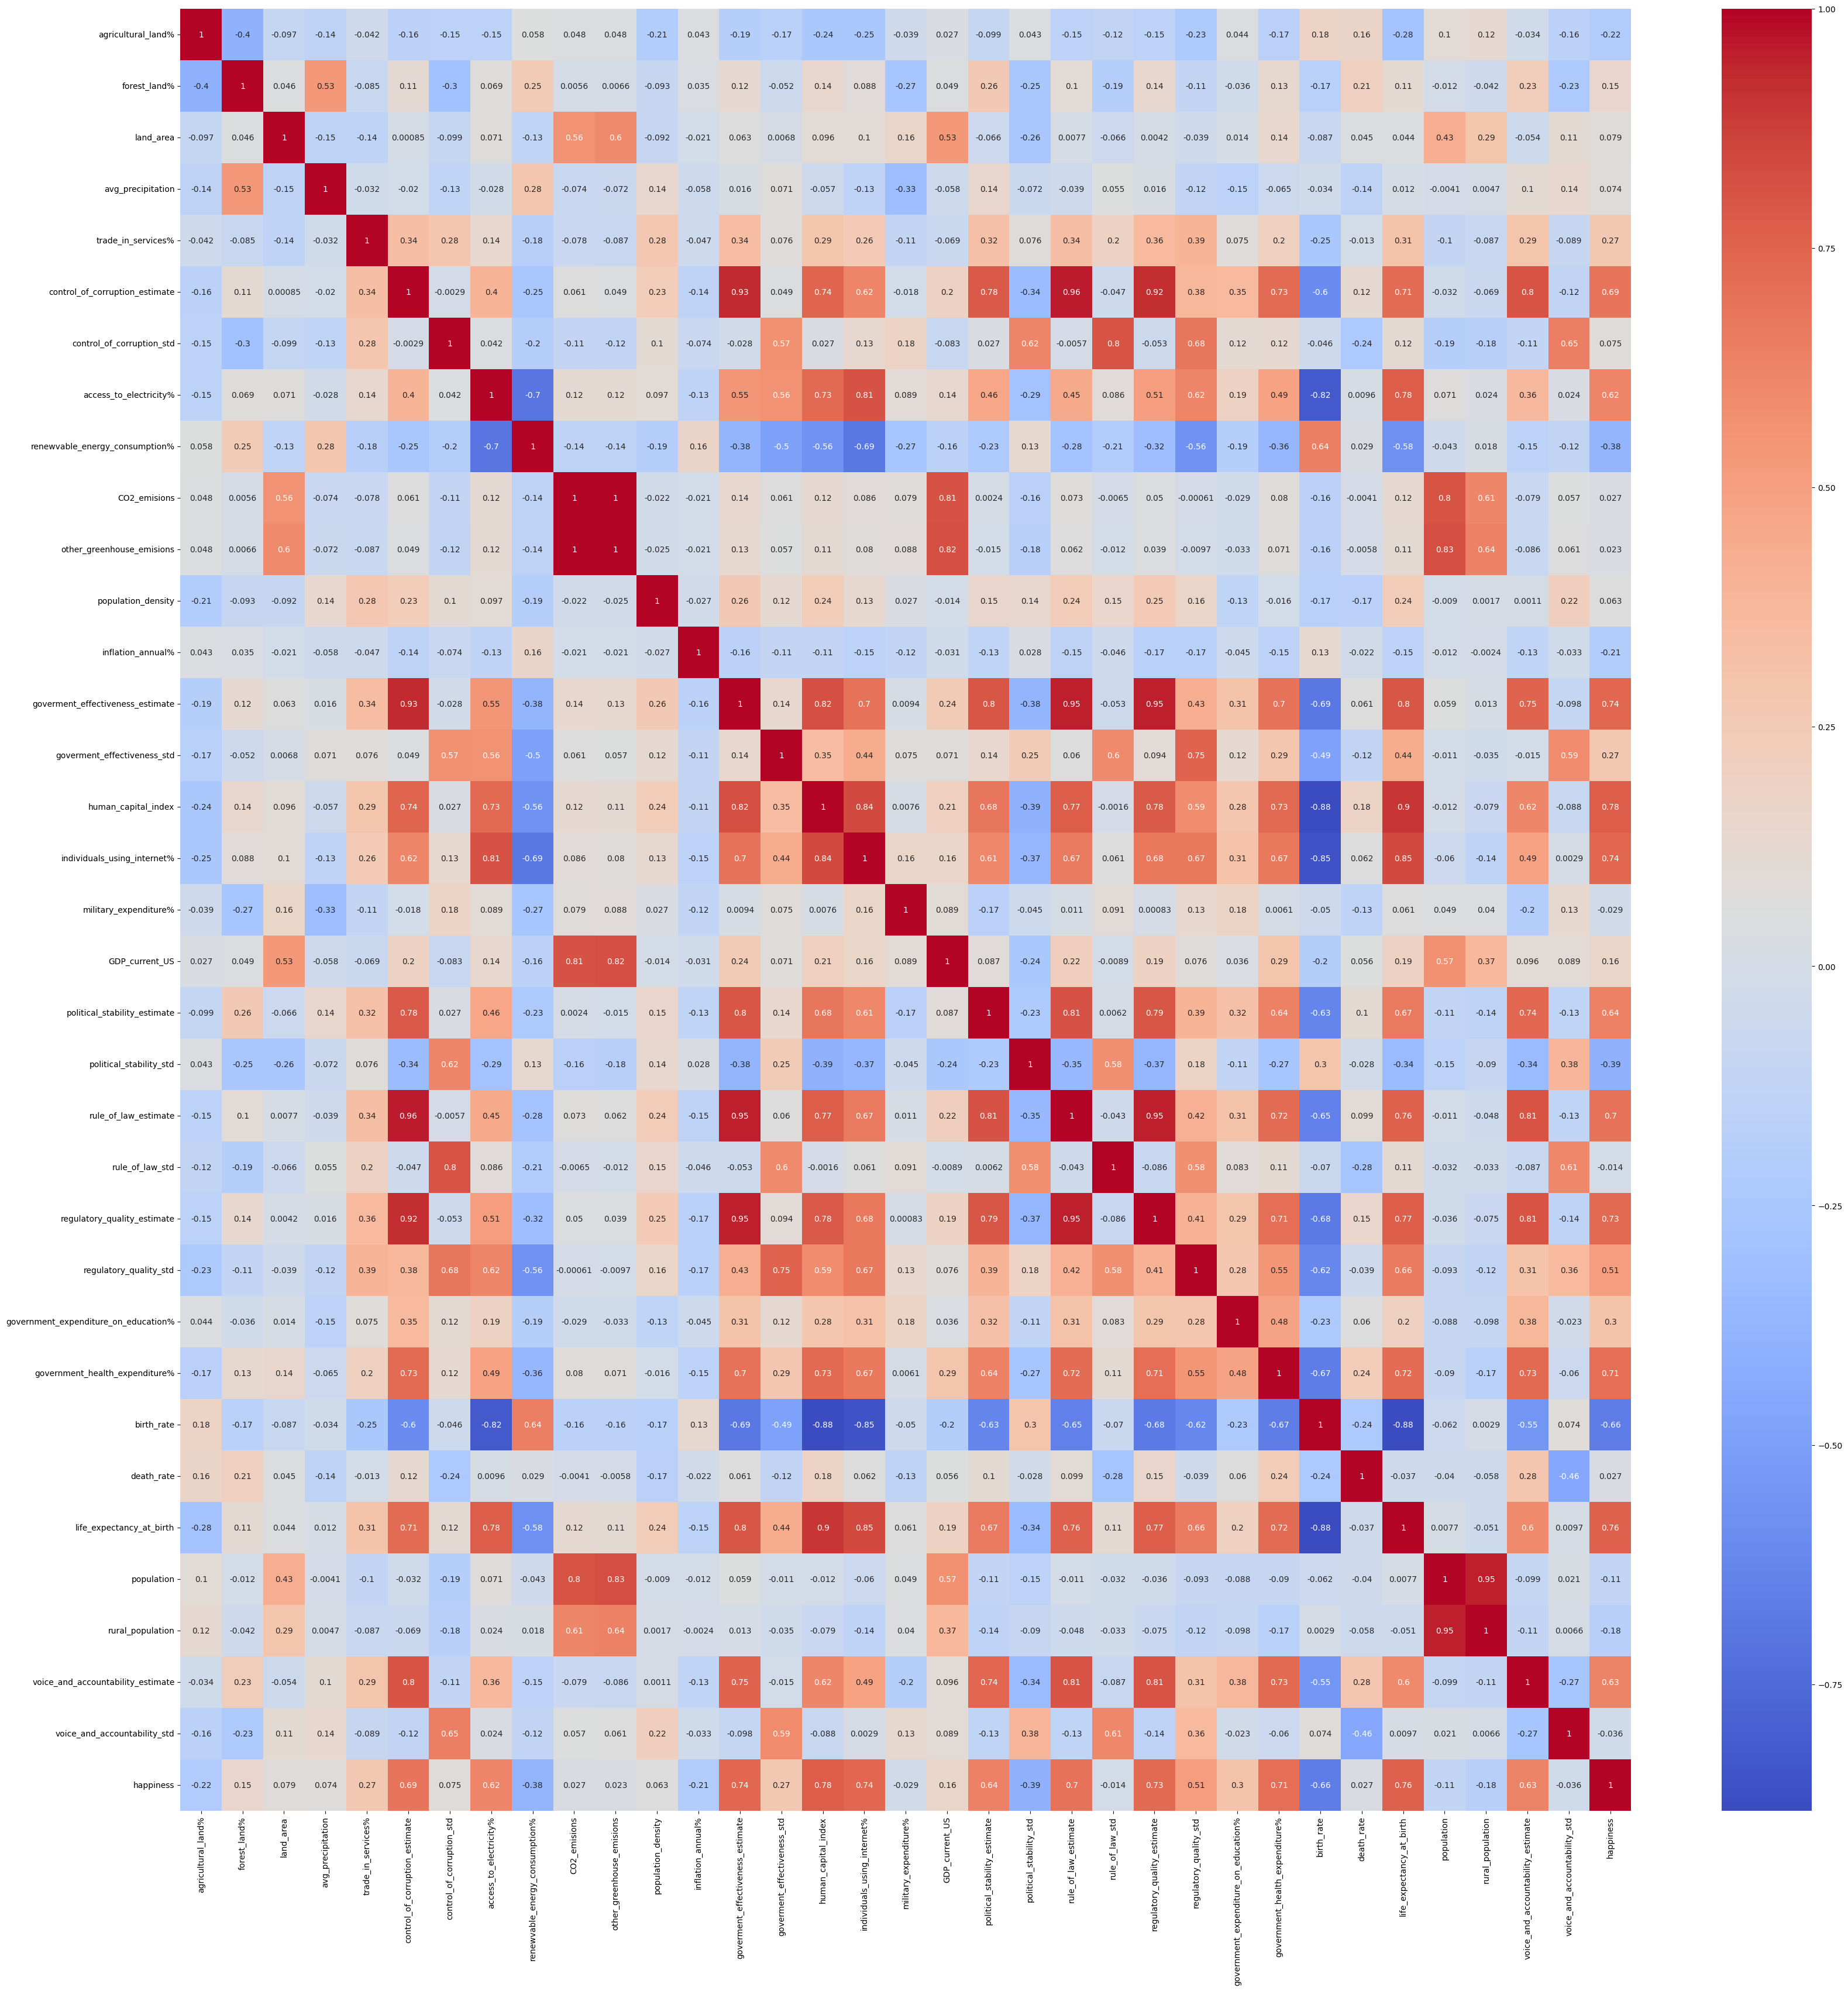

In [16]:
plt.figure(figsize=(40,40))
corr = train_data.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

# Modelling & Prediction

### Create train & dev sets

In [17]:
from sklearn.model_selection import train_test_split

y = train_data['happiness']
X = train_data.drop(['happiness'], axis=1)

# split data into train and test data
X_train, X_dev, y_train, y_dev = train_test_split(X, y, test_size=0.2, random_state=43) # try 21


### Linear Regression

Mean squared error: 0.38
Coefficient of determination: 0.57


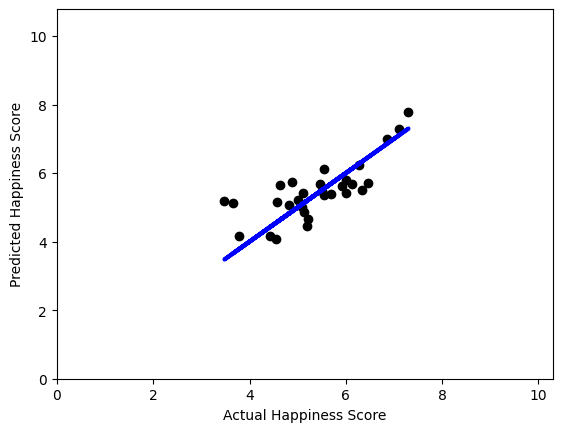

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr_model = LinearRegression()
lr_model.fit(X_train[numeric_columns], y_train)

y_pred = lr_model.predict(X_dev[numeric_columns])

# visualize  results
print('Mean squared error: %.2f' % mean_squared_error(y_dev, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_dev, y_pred))

plt.scatter(y_dev, y_pred, color='black')
plt.plot(y_dev, y_dev, color='blue', linewidth=3)
plt.xlabel('Actual Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.xlim([0, max(y_dev) + 3])
plt.ylim([0, max(y_pred) + 3])
plt.show()

In [19]:
# print the predictions of the dev set
dev_result = pd.DataFrame()
dev_result['country'] = X_dev['country']
dev_result['actual'] = y_dev
dev_result['predicted'] = y_pred
dev_result['difference'] = dev_result['actual'] - dev_result['predicted']
dev_result.sort_values(by=['difference'])

,country,actual,predicted,difference
28,Botswana,3.4789,5.187009,-1.708109
139,Lesotho,3.6528,5.124015,-1.471215
122,Jordan,4.6334,5.658444,-1.025045
3,Albania,4.8827,5.738909,-0.856209
252,Ukraine,4.5607,5.164677,-0.603978
167,Montenegro,5.5461,6.105438,-0.559338
176,New Zealand,7.2996,7.783691,-0.484091
34,Burundi,3.7753,4.165428,-0.390128
32,Bulgaria,5.1015,5.429844,-0.328344
166,Mongolia,5.4562,5.691054,-0.234854


### Random forest

Mean squared error: 0.42
Coefficient of determination: 0.53


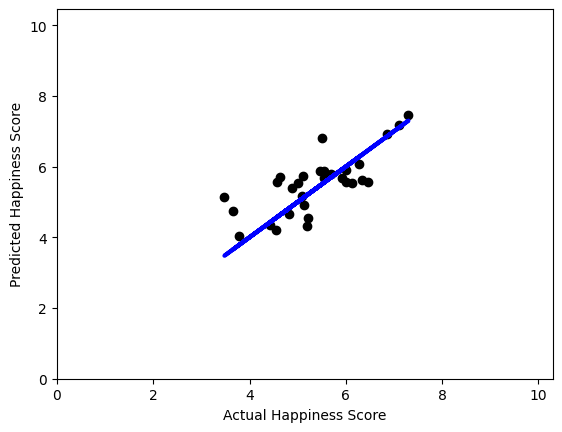

In [20]:
from sklearn.ensemble import RandomForestRegressor

# create random forest model
rf_model = RandomForestRegressor(n_estimators=40, random_state=42)
rf_model.fit(X_train[numeric_columns], y_train)

# predict happiness score
y_pred = rf_model.predict(X_dev[numeric_columns])

# visualize  results
print('Mean squared error: %.2f' % mean_squared_error(y_dev, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_dev, y_pred))

plt.scatter(y_dev, y_pred, color='black')
plt.plot(y_dev, y_dev, color='blue', linewidth=3)
plt.xlabel('Actual Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.xlim([0, max(y_dev) + 3])
plt.ylim([0, max(y_pred) + 3])
plt.show()

# Run prediction on test data

In [21]:
y_pred_lr = lr_model.predict(test_data.drop(['country', 'happiness'], axis=1))
y_pred_rf = rf_model.predict(test_data.drop(['country', 'happiness'], axis=1))

# Print predictions
test_results = pd.DataFrame()
test_results['country'] = test_data['country']
test_results['happiness_rf'] = y_pred_rf
test_results['happiness_rf'] = test_results['happiness_rf'].apply(lambda x: round(x, 1))
test_results['happiness_lr'] = y_pred_lr
test_results['happiness_lr'] = test_results['happiness_lr'].apply(lambda x: round(x, 1))
test_results['difference'] = test_results['happiness_rf'] - test_results['happiness_lr']
test_results = test_results.sort_values(by=['happiness_rf'], ascending=False)

# The (predicted) happiest countries/regions

In [22]:
test_results.head(25)

,country,happiness_rf,happiness_lr,difference
148,"Macao SAR, China",6.8,4.2,2.6
142,Liechtenstein,6.8,7.0,-0.2
6,Andorra,6.6,5.7,0.9
201,Qatar,6.5,6.2,0.3
93,Greenland,6.4,7.2,-0.8
186,Oman,6.3,6.2,0.1
262,Virgin Islands (U.S.),6.2,5.1,1.1
229,St. Vincent and the Grenadines,6.2,4.4,1.8
40,Cayman Islands,6.1,6.3,-0.2
61,Dominica,6.1,4.6,1.5


# The (predicted) unhappiest countries/regions

In [23]:
test_results.tail(25)

,country,happiness_rf,happiness_lr,difference
241,Timor-Leste,4.9,5.7,-0.8
146,Lower middle income,4.8,5.4,-0.6
2,Africa Western and Central,4.8,5.7,-0.9
219,Somalia,4.8,6.1,-1.3
159,"Micronesia, Fed. Sts.",4.8,4.1,0.7
230,Sub-Saharan Africa,4.7,5.5,-0.8
60,Djibouti,4.7,5.2,-0.5
108,IDA blend,4.7,5.9,-1.2
231,Sub-Saharan Africa (IDA & IBRD countries),4.7,5.5,-0.8
232,Sub-Saharan Africa (excluding high income),4.7,5.5,-0.8
